In [2]:

import pandas as pd

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [4]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
iris = fetch_ucirepo(id=53) 

In [5]:
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
dataset = iris.data.original
target_names = iris.target_names
# metadata 
print(iris.metadata) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [6]:
print(dataset)

     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


# –ó–∞–¥–∞–Ω–∏–µ 2 (–†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â–∏–µ –∏ —Ç–µ—Å—Ç–æ–≤—ã–µ)

In [7]:
train_indices = dataset.sample(frac=0.8, random_state=42).index

# –°–æ–∑–¥–∞–µ–º –º–∞—Å–∫—É –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è
train_mask = dataset.index.isin(train_indices)

# –†–∞–∑–¥–µ–ª—è–µ–º –¥–∞–Ω–Ω—ã–µ
train_dataset = dataset[train_mask]
test_dataset = dataset[~train_mask]

In [8]:
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –≤ –æ–±—É—á–∞—é—â–µ–º –º–Ω–æ–∂–µ—Å—Ç–≤–µ: ",train_dataset.shape[0])

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –≤ –æ–±—É—á–∞—é—â–µ–º –º–Ω–æ–∂–µ—Å—Ç–≤–µ:  120


In [9]:
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤ –≤ –∫–∞–∂–¥–æ–º –∫–ª–∞—Å—Å–µ:\n ",train_dataset['class'].value_counts())

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤ –≤ –∫–∞–∂–¥–æ–º –∫–ª–∞—Å—Å–µ:
  class
Iris-setosa        43
Iris-versicolor    39
Iris-virginica     38
Name: count, dtype: int64


In [10]:
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π: \n",train_dataset.isnull().sum())

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π: 
 sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64


In [11]:
print("–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞: \n",train_dataset.max())

–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞: 
 sepal length               7.9
sepal width                4.4
petal length               6.9
petal width                2.5
class           Iris-virginica
dtype: object


In [12]:
print("–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞: \n",train_dataset.min())

–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞: 
 sepal length            4.3
sepal width             2.0
petal length            1.0
petal width             0.1
class           Iris-setosa
dtype: object


In [13]:
print("–°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞: \n",train_dataset.drop('class',axis=1).mean())

–°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞: 
 sepal length    5.803333
sepal width     3.074167
petal length    3.669167
petal width     1.171667
dtype: float64


In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y_encoded = np.squeeze( le.fit_transform(y))
X_train, X_test, y_train, y_test = train_test_split(
    X, np.squeeze(y_encoded), test_size=0.2, random_state=42
)

model = GaussianNB()

model.fit(X_train, y_train)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è –æ–±—É—á–∞—é—â–µ–≥–æ –∏ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –º–Ω–æ–∂–µ—Å—Ç–≤
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


C:\Users\maksk\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


–¢–ê–ë–õ–ò–¶–ê –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò - –û–ë–£–ß–ê–Æ–©–ï–ï –ú–ù–û–ñ–ï–°–¢–í–û:
[[40  0  0]
 [ 0 38  3]
 [ 0  3 36]]

–¢–ê–ë–õ–ò–¶–ê –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò - –¢–ï–°–¢–û–í–û–ï –ú–ù–û–ñ–ï–°–¢–í–û:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



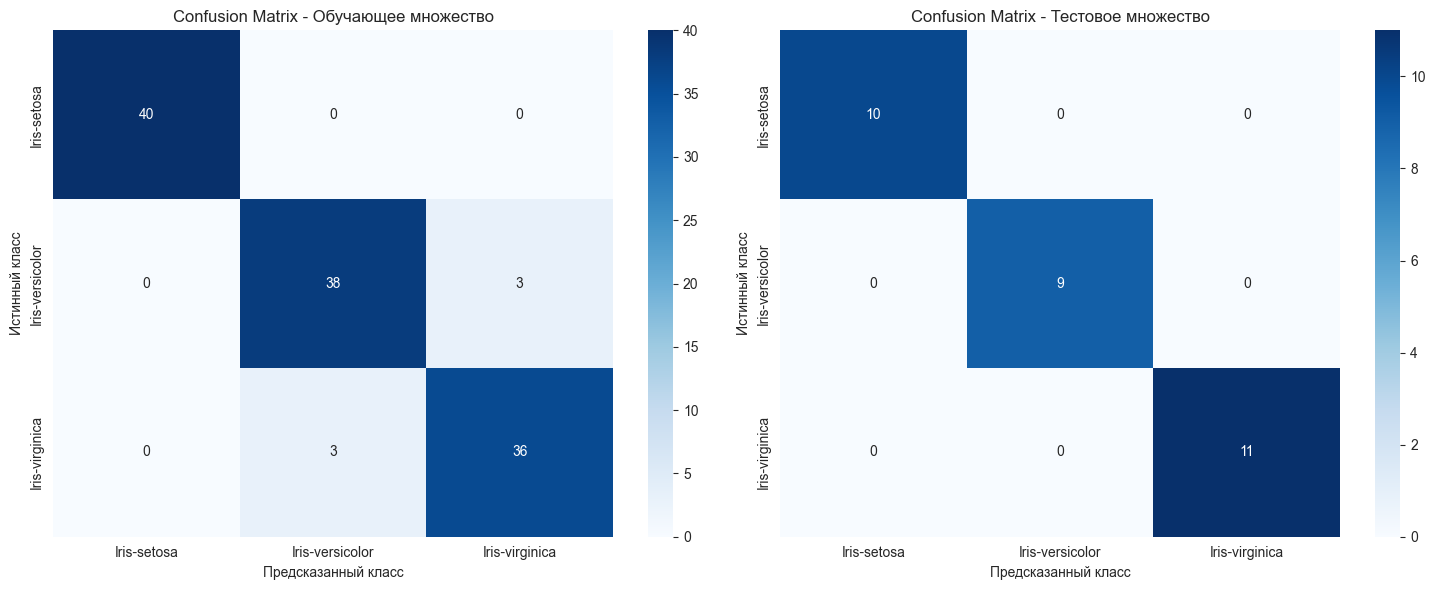

In [19]:
# –¢–∞–±–ª–∏—Ü–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –¥–ª—è –æ–±—É—á–∞—é—â–µ–≥–æ –º–Ω–æ–∂–µ—Å—Ç–≤–∞
train_cm = confusion_matrix(y_train, y_train_pred)
print("–¢–ê–ë–õ–ò–¶–ê –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò - –û–ë–£–ß–ê–Æ–©–ï–ï –ú–ù–û–ñ–ï–°–¢–í–û:")
print(train_cm)
print()

# –¢–∞–±–ª–∏—Ü–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –º–Ω–æ–∂–µ—Å—Ç–≤–∞
test_cm = confusion_matrix(y_test, y_test_pred)
print("–¢–ê–ë–õ–ò–¶–ê –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò - –¢–ï–°–¢–û–í–û–ï –ú–ù–û–ñ–ï–°–¢–í–û:")
print(test_cm)
print()

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ç–∞–±–ª–∏—Ü –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# –û–±—É—á–∞—é—â–µ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_, ax=ax1)
ax1.set_title('Confusion Matrix - –û–±—É—á–∞—é—â–µ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ')
ax1.set_xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å')
ax1.set_ylabel('–ò—Å—Ç–∏–Ω–Ω—ã–π –∫–ª–∞—Å—Å')

# –¢–µ—Å—Ç–æ–≤–æ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_, ax=ax2)
ax2.set_title('Confusion Matrix - –¢–µ—Å—Ç–æ–≤–æ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ')
ax2.set_xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å')
ax2.set_ylabel('–ò—Å—Ç–∏–Ω–Ω—ã–π –∫–ª–∞—Å—Å')

plt.tight_layout()
plt.show()

In [20]:
def calculate_metrics(cm, class_names):
    """
    –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏–∑ confusion matrix
    """
    metrics = {}
    total = np.sum(cm)

    # –û–±—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å –∏ —É—Ä–æ–≤–µ–Ω—å –æ—à–∏–±–∫–∏
    accuracy = np.trace(cm) / total
    error_rate = 1 - accuracy

    metrics['Overall_Accuracy'] = accuracy
    metrics['Overall_Error_Rate'] = error_rate

    # –ú–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞
    class_metrics = {}
    for i, class_name in enumerate(class_names):
        TP = cm[i, i]
        FP = np.sum(cm[:, i]) - TP
        FN = np.sum(cm[i, :]) - TP
        TN = total - TP - FP - FN

        # –¢–æ—á–Ω–æ—Å—Ç—å (Precision)
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0

        # –ß—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å (Recall/Sensitivity)
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0

        # –°–ø–µ—Ü–∏—Ñ–∏—á–Ω–æ—Å—Ç—å (Specificity)
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        class_metrics[class_name] = {
            'Precision': precision,
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'TP': TP,
            'FP': FP,
            'FN': FN,
            'TN': TN
        }

    metrics['Class_Metrics'] = class_metrics
    return metrics

# –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫ –¥–ª—è –æ–±—É—á–∞—é—â–µ–≥–æ –º–Ω–æ–∂–µ—Å—Ç–≤–∞
train_metrics = calculate_metrics(train_cm, le.classes_)
test_metrics = calculate_metrics(test_cm, le.classes_)

In [21]:
# –í—ã–≤–æ–¥ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –¥–ª—è –æ–±—É—á–∞—é—â–µ–≥–æ –º–Ω–æ–∂–µ—Å—Ç–≤–∞
print("=" * 60)
print("–•–ê–†–ê–ö–¢–ï–†–ò–°–¢–ò–ö–ò –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò - –û–ë–£–ß–ê–Æ–©–ï–ï –ú–ù–û–ñ–ï–°–¢–í–û")
print("=" * 60)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: {train_metrics['Overall_Accuracy']:.4f}")
print(f"–£—Ä–æ–≤–µ–Ω—å –æ—à–∏–±–∫–∏: {train_metrics['Overall_Error_Rate']:.4f}")
print("\n–ú–µ—Ç—Ä–∏–∫–∏ –ø–æ –∫–ª–∞—Å—Å–∞–º:")
for class_name in le.classes_:
    metrics = train_metrics['Class_Metrics'][class_name]
    print(f"\n{class_name}:")
    print(f"  –¢–æ—á–Ω–æ—Å—Ç—å (Precision): {metrics['Precision']:.4f}")
    print(f"  –ß—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å (Sensitivity): {metrics['Sensitivity']:.4f}")
    print(f"  –°–ø–µ—Ü–∏—Ñ–∏—á–Ω–æ—Å—Ç—å (Specificity): {metrics['Specificity']:.4f}")

print("\n" + "=" * 60)
print("–•–ê–†–ê–ö–¢–ï–†–ò–°–¢–ò–ö–ò –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò - –¢–ï–°–¢–û–í–û–ï –ú–ù–û–ñ–ï–°–¢–í–û")
print("=" * 60)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: {test_metrics['Overall_Accuracy']:.4f}")
print(f"–£—Ä–æ–≤–µ–Ω—å –æ—à–∏–±–∫–∏: {test_metrics['Overall_Error_Rate']:.4f}")
print("\n–ú–µ—Ç—Ä–∏–∫–∏ –ø–æ –∫–ª–∞—Å—Å–∞–º:")
for class_name in le.classes_:
    metrics = test_metrics['Class_Metrics'][class_name]
    print(f"\n{class_name}:")
    print(f"  –¢–æ—á–Ω–æ—Å—Ç—å (Precision): {metrics['Precision']:.4f}")
    print(f"  –ß—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å (Sensitivity): {metrics['Sensitivity']:.4f}")
    print(f"  –°–ø–µ—Ü–∏—Ñ–∏—á–Ω–æ—Å—Ç—å (Specificity): {metrics['Specificity']:.4f}")

–•–ê–†–ê–ö–¢–ï–†–ò–°–¢–ò–ö–ò –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò - –û–ë–£–ß–ê–Æ–©–ï–ï –ú–ù–û–ñ–ï–°–¢–í–û
–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: 0.9500
–£—Ä–æ–≤–µ–Ω—å –æ—à–∏–±–∫–∏: 0.0500

–ú–µ—Ç—Ä–∏–∫–∏ –ø–æ –∫–ª–∞—Å—Å–∞–º:

Iris-setosa:
  –¢–æ—á–Ω–æ—Å—Ç—å (Precision): 1.0000
  –ß—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å (Sensitivity): 1.0000
  –°–ø–µ—Ü–∏—Ñ–∏—á–Ω–æ—Å—Ç—å (Specificity): 1.0000

Iris-versicolor:
  –¢–æ—á–Ω–æ—Å—Ç—å (Precision): 0.9268
  –ß—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å (Sensitivity): 0.9268
  –°–ø–µ—Ü–∏—Ñ–∏—á–Ω–æ—Å—Ç—å (Specificity): 0.9620

Iris-virginica:
  –¢–æ—á–Ω–æ—Å—Ç—å (Precision): 0.9231
  –ß—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å (Sensitivity): 0.9231
  –°–ø–µ—Ü–∏—Ñ–∏—á–Ω–æ—Å—Ç—å (Specificity): 0.9630

–•–ê–†–ê–ö–¢–ï–†–ò–°–¢–ò–ö–ò –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò - –¢–ï–°–¢–û–í–û–ï –ú–ù–û–ñ–ï–°–¢–í–û
–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: 1.0000
–£—Ä–æ–≤–µ–Ω—å –æ—à–∏–±–∫–∏: 0.0000

–ú–µ—Ç—Ä–∏–∫–∏ –ø–æ –∫–ª–∞—Å—Å–∞–º:

Iris-setosa:
  –¢–æ—á–Ω–æ—Å—Ç—å (Precision): 1.0000
  –ß—É–≤—Å—Ç–≤–∏

     sepal length  sepal width
0             5.1          3.5
1             4.9          3.0
2             4.7          3.2
3             4.6          3.1
4             5.0          3.6
..            ...          ...
145           6.7          3.0
146           6.3          2.5
147           6.5          3.0
148           6.2          3.4
149           5.9          3.0

[150 rows x 2 columns]
–¢–ê–ë–õ–ò–¶–ê –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò - –û–ë–£–ß–ê–Æ–©–ï–ï –ú–ù–û–ñ–ï–°–¢–í–û:
[[39  1  0]
 [ 0 30 11]
 [ 0 15 24]]

–¢–ê–ë–õ–ò–¶–ê –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò - –¢–ï–°–¢–û–í–û–ï –ú–ù–û–ñ–ï–°–¢–í–û:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]



C:\Users\maksk\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


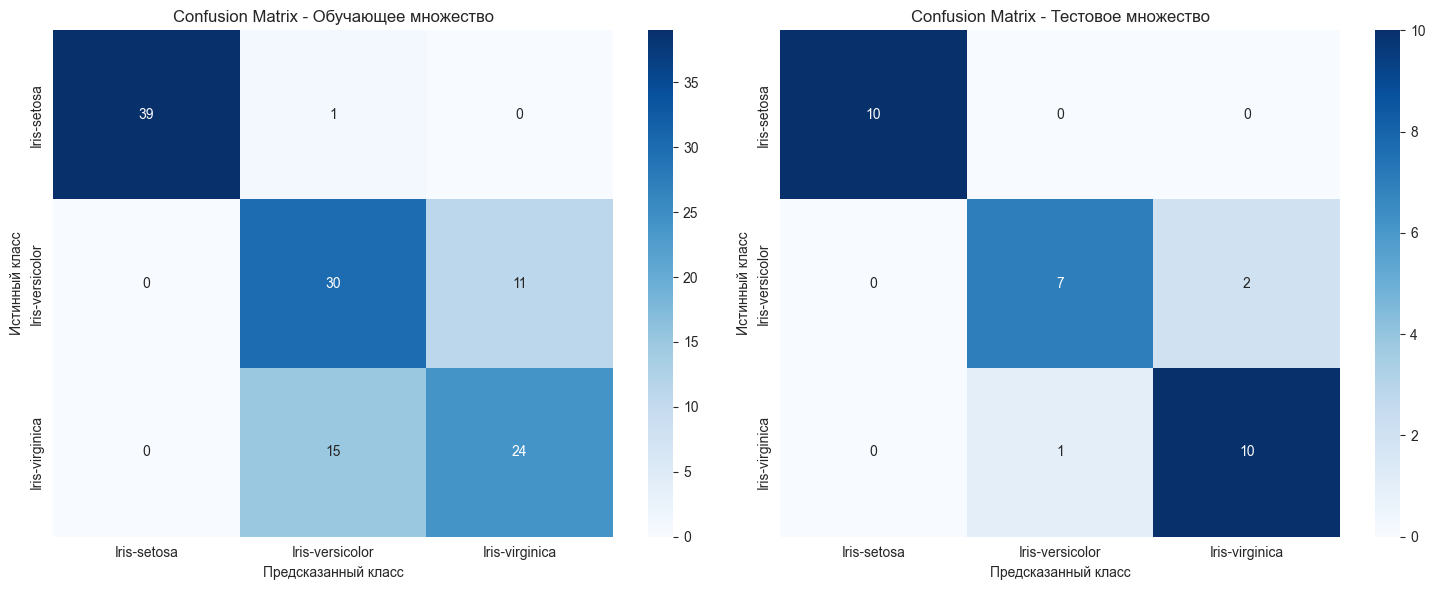

–•–ê–†–ê–ö–¢–ï–†–ò–°–¢–ò–ö–ò –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò - –û–ë–£–ß–ê–Æ–©–ï–ï –ú–ù–û–ñ–ï–°–¢–í–û
–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: 0.7750
–£—Ä–æ–≤–µ–Ω—å –æ—à–∏–±–∫–∏: 0.2250

–ú–µ—Ç—Ä–∏–∫–∏ –ø–æ –∫–ª–∞—Å—Å–∞–º:

Iris-setosa:
  –¢–æ—á–Ω–æ—Å—Ç—å (Precision): 1.0000
  –ß—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å (Sensitivity): 0.9750
  –°–ø–µ—Ü–∏—Ñ–∏—á–Ω–æ—Å—Ç—å (Specificity): 1.0000

Iris-versicolor:
  –¢–æ—á–Ω–æ—Å—Ç—å (Precision): 0.6522
  –ß—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å (Sensitivity): 0.7317
  –°–ø–µ—Ü–∏—Ñ–∏—á–Ω–æ—Å—Ç—å (Specificity): 0.7975

Iris-virginica:
  –¢–æ—á–Ω–æ—Å—Ç—å (Precision): 0.6857
  –ß—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å (Sensitivity): 0.6154
  –°–ø–µ—Ü–∏—Ñ–∏—á–Ω–æ—Å—Ç—å (Specificity): 0.8642

–•–ê–†–ê–ö–¢–ï–†–ò–°–¢–ò–ö–ò –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò - –¢–ï–°–¢–û–í–û–ï –ú–ù–û–ñ–ï–°–¢–í–û
–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: 0.9000
–£—Ä–æ–≤–µ–Ω—å –æ—à–∏–±–∫–∏: 0.1000

–ú–µ—Ç—Ä–∏–∫–∏ –ø–æ –∫–ª–∞—Å—Å–∞–º:

Iris-setosa:
  –¢–æ—á–Ω–æ—Å—Ç—å (Precision): 1.0000
  –ß—É–≤—Å—Ç–≤–∏

In [27]:
X_new = X.drop("petal length", axis=1)
X_new  = X_new.drop("petal width", axis=1)
print(X_new)
le = LabelEncoder()
y_encoded = np.squeeze(le.fit_transform(y))
X_train, X_test, y_train, y_test = train_test_split(
    X_new, np.squeeze(y_encoded), test_size=0.2, random_state=42
)

model = GaussianNB()

model.fit(X_train, y_train)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è –æ–±—É—á–∞—é—â–µ–≥–æ –∏ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –º–Ω–æ–∂–µ—Å—Ç–≤
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# –¢–∞–±–ª–∏—Ü–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –¥–ª—è –æ–±—É—á–∞—é—â–µ–≥–æ –º–Ω–æ–∂–µ—Å—Ç–≤–∞
train_cm = confusion_matrix(y_train, y_train_pred)
print("–¢–ê–ë–õ–ò–¶–ê –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò - –û–ë–£–ß–ê–Æ–©–ï–ï –ú–ù–û–ñ–ï–°–¢–í–û:")
print(train_cm)
print()

# –¢–∞–±–ª–∏—Ü–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –º–Ω–æ–∂–µ—Å—Ç–≤–∞
test_cm = confusion_matrix(y_test, y_test_pred)
print("–¢–ê–ë–õ–ò–¶–ê –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò - –¢–ï–°–¢–û–í–û–ï –ú–ù–û–ñ–ï–°–¢–í–û:")
print(test_cm)
print()

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ç–∞–±–ª–∏—Ü –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# –û–±—É—á–∞—é—â–µ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_, ax=ax1)
ax1.set_title('Confusion Matrix - –û–±—É—á–∞—é—â–µ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ')
ax1.set_xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å')
ax1.set_ylabel('–ò—Å—Ç–∏–Ω–Ω—ã–π –∫–ª–∞—Å—Å')

# –¢–µ—Å—Ç–æ–≤–æ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_, ax=ax2)
ax2.set_title('Confusion Matrix - –¢–µ—Å—Ç–æ–≤–æ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ')
ax2.set_xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å')
ax2.set_ylabel('–ò—Å—Ç–∏–Ω–Ω—ã–π –∫–ª–∞—Å—Å')

plt.tight_layout()
plt.show()


def calculate_metrics(cm, class_names):
    """
    –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏–∑ confusion matrix
    """
    metrics = {}
    total = np.sum(cm)

    # –û–±—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å –∏ —É—Ä–æ–≤–µ–Ω—å –æ—à–∏–±–∫–∏
    accuracy = np.trace(cm) / total
    error_rate = 1 - accuracy

    metrics['Overall_Accuracy'] = accuracy
    metrics['Overall_Error_Rate'] = error_rate

    # –ú–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞
    class_metrics = {}
    for i, class_name in enumerate(class_names):
        TP = cm[i, i]
        FP = np.sum(cm[:, i]) - TP
        FN = np.sum(cm[i, :]) - TP
        TN = total - TP - FP - FN

        # –¢–æ—á–Ω–æ—Å—Ç—å (Precision)
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0

        # –ß—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å (Recall/Sensitivity)
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0

        # –°–ø–µ—Ü–∏—Ñ–∏—á–Ω–æ—Å—Ç—å (Specificity)
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        class_metrics[class_name] = {
            'Precision': precision,
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'TP': TP,
            'FP': FP,
            'FN': FN,
            'TN': TN
        }

    metrics['Class_Metrics'] = class_metrics
    return metrics


# –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫ –¥–ª—è –æ–±—É—á–∞—é—â–µ–≥–æ –º–Ω–æ–∂–µ—Å—Ç–≤–∞
train_metrics = calculate_metrics(train_cm, le.classes_)
test_metrics = calculate_metrics(test_cm, le.classes_)
# –í—ã–≤–æ–¥ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –¥–ª—è –æ–±—É—á–∞—é—â–µ–≥–æ –º–Ω–æ–∂–µ—Å—Ç–≤–∞
print("=" * 60)
print("–•–ê–†–ê–ö–¢–ï–†–ò–°–¢–ò–ö–ò –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò - –û–ë–£–ß–ê–Æ–©–ï–ï –ú–ù–û–ñ–ï–°–¢–í–û")
print("=" * 60)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: {train_metrics['Overall_Accuracy']:.4f}")
print(f"–£—Ä–æ–≤–µ–Ω—å –æ—à–∏–±–∫–∏: {train_metrics['Overall_Error_Rate']:.4f}")
print("\n–ú–µ—Ç—Ä–∏–∫–∏ –ø–æ –∫–ª–∞—Å—Å–∞–º:")
for class_name in le.classes_:
    metrics = train_metrics['Class_Metrics'][class_name]
    print(f"\n{class_name}:")
    print(f"  –¢–æ—á–Ω–æ—Å—Ç—å (Precision): {metrics['Precision']:.4f}")
    print(f"  –ß—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å (Sensitivity): {metrics['Sensitivity']:.4f}")
    print(f"  –°–ø–µ—Ü–∏—Ñ–∏—á–Ω–æ—Å—Ç—å (Specificity): {metrics['Specificity']:.4f}")

print("\n" + "=" * 60)
print("–•–ê–†–ê–ö–¢–ï–†–ò–°–¢–ò–ö–ò –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò - –¢–ï–°–¢–û–í–û–ï –ú–ù–û–ñ–ï–°–¢–í–û")
print("=" * 60)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: {test_metrics['Overall_Accuracy']:.4f}")
print(f"–£—Ä–æ–≤–µ–Ω—å –æ—à–∏–±–∫–∏: {test_metrics['Overall_Error_Rate']:.4f}")
print("\n–ú–µ—Ç—Ä–∏–∫–∏ –ø–æ –∫–ª–∞—Å—Å–∞–º:")
for class_name in le.classes_:
    metrics = test_metrics['Class_Metrics'][class_name]
    print(f"\n{class_name}:")
    print(f"  –¢–æ—á–Ω–æ—Å—Ç—å (Precision): {metrics['Precision']:.4f}")
    print(f"  –ß—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å (Sensitivity): {metrics['Sensitivity']:.4f}")
    print(f"  –°–ø–µ—Ü–∏—Ñ–∏—á–Ω–æ—Å—Ç—å (Specificity): {metrics['Specificity']:.4f}")

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [32]:
# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –¥–µ—Ä–µ–≤–∞ —Ä–µ—à–µ–Ω–∏–π —Å 4 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
X_train, X_test, y_train, y_test = train_test_split(
    X, np.squeeze(y_encoded), test_size=0.2, random_state=42
)
dt_model_4 = DecisionTreeClassifier(
    max_depth=3,  # –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –≥–ª—É–±–∏–Ω—É –¥–ª—è –ª—É—á—à–µ–π –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
    random_state=42
)
dt_model_4.fit(X_train, y_train)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred = dt_model_4.predict(X_test)

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
accuracy_4 = accuracy_score(y_test, y_pred)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ —Å 4 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏: {accuracy_4:.4f}")

–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ —Å 4 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏: 1.0000


In [51]:
# –ì—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –¥–µ—Ä–µ–≤–∞ —Å 4 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
plt.figure(figsize=(20, 10))
plot_tree(dt_model_4,
          feature_names=['petal length', 'petal width','sepal length', 'sepal width'],
          class_names=target_names,
          filled=True,
          rounded=True,
          fontsize=12)
plt.title('–î–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π - 4 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ (–≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏)', fontsize=16, pad=20)
plt.show()

AttributeError: 'list' object has no attribute 'values'

<Figure size 2000x1000 with 0 Axes>

In [36]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_new, y, test_size=0.3, random_state=42, stratify=y
)

# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –¥–µ—Ä–µ–≤–∞ —Ä–µ—à–µ–Ω–∏–π —Å 2 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
dt_model_2 = DecisionTreeClassifier(
    max_depth=3,
    random_state=42
)
dt_model_2.fit(X_train_2, y_train_2)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_2 = dt_model_2.predict(X_test_2)

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ —Å 2 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏: {accuracy_2:.4f}")

–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ —Å 2 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏: 0.7333


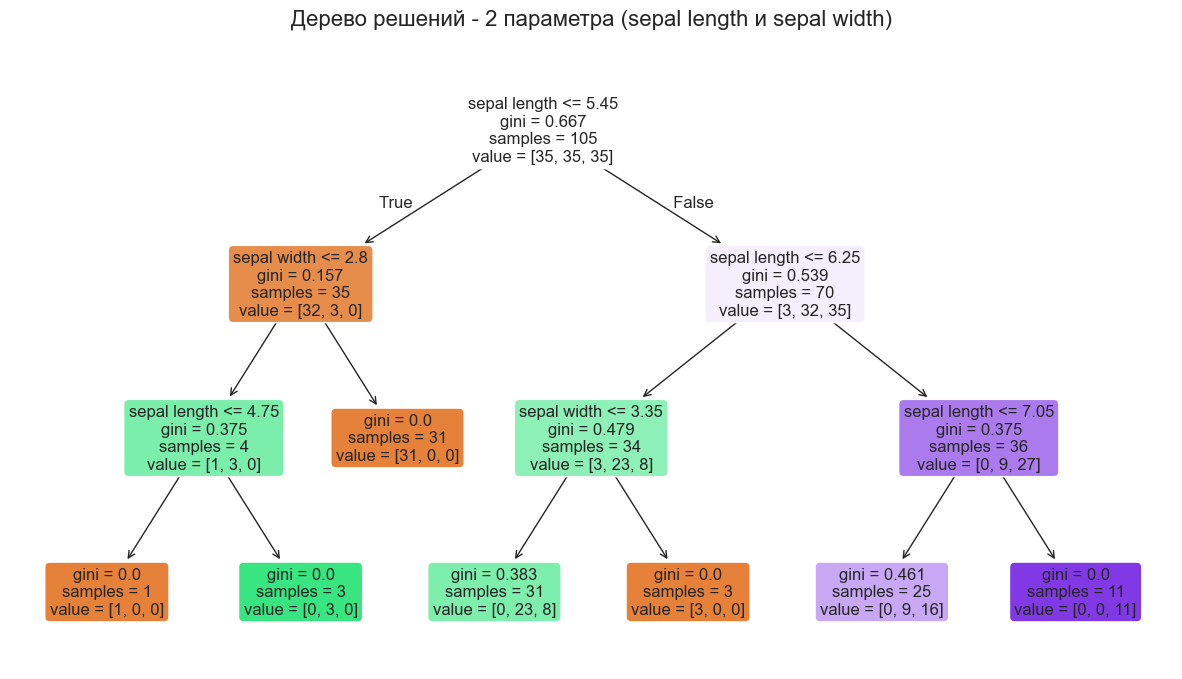

In [37]:
# –ì—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –¥–µ—Ä–µ–≤–∞ —Å 2 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
plt.figure(figsize=(15, 8))
plot_tree(dt_model_2,
          feature_names=['sepal length', 'sepal width'],
          class_names=target_names,
          filled=True,
          rounded=True,
          fontsize=12)
plt.title('–î–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π - 2 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ (sepal length –∏ sepal width)', fontsize=16, pad=20)
plt.show()

In [40]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [56]:
# –í—ã–±–æ—Ä —Ç–æ–ª—å–∫–æ –¥–≤—É—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤: sepal length –∏ sepal width
X_2d = X[['sepal length', 'sepal width']].values

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ —Å—Ç—Ä–æ–∫–æ–≤—ã—Ö –º–µ—Ç–æ–∫ –≤ —á–∏—Å–ª–æ–≤—ã–µ
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"–°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –º–µ—Ç–æ–∫: {dict(zip(le.classes_, le.transform(le.classes_)))}")
print(f"y_encoded: {y_encoded[:10]}")  # –ü–µ—Ä–≤—ã–µ 10 –∑–Ω–∞—á–µ–Ω–∏–π

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test, y_train_orig, y_test_orig = train_test_split(
    X_2d, y_encoded, y, test_size=0.2, random_state=42, stratify=y_encoded
)

# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n–†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏: {X_train.shape}")
print(f"–¢–∏–ø y_train: {type(y_train)}")

–°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –º–µ—Ç–æ–∫: {'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}
y_encoded: [0 0 0 0 0 0 0 0 0 0]

–†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏: (120, 2)
–¢–∏–ø y_train: <class 'numpy.ndarray'>


C:\Users\maksk\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
# –°–æ–∑–¥–∞–Ω–∏–µ SVM –º–æ–¥–µ–ª–µ–π —Å —Ä–∞–∑–Ω—ã–º–∏ —è–¥—Ä–∞–º–∏
svm_models = {
    'linear': SVC(kernel='linear', random_state=42),
    'rbf': SVC(kernel='rbf', random_state=42),
    'poly': SVC(kernel='poly', degree=3, random_state=42),
    'sigmoid': SVC(kernel='sigmoid', random_state=42)
}

# –û–±—É—á–µ–Ω–∏–µ –∏ –æ—Ü–µ–Ω–∫–∞ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π
results = {}
for kernel, model in svm_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[kernel] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred
    }
    print(f"SVM —Å —è–¥—Ä–æ–º '{kernel}': –¢–æ—á–Ω–æ—Å—Ç—å = {accuracy:.4f}")

SVM —Å —è–¥—Ä–æ–º 'linear': –¢–æ—á–Ω–æ—Å—Ç—å = 0.7333
SVM —Å —è–¥—Ä–æ–º 'rbf': –¢–æ—á–Ω–æ—Å—Ç—å = 0.7000
SVM —Å —è–¥—Ä–æ–º 'poly': –¢–æ—á–Ω–æ—Å—Ç—å = 0.7000
SVM —Å —è–¥—Ä–æ–º 'sigmoid': –¢–æ—á–Ω–æ—Å—Ç—å = 0.7667


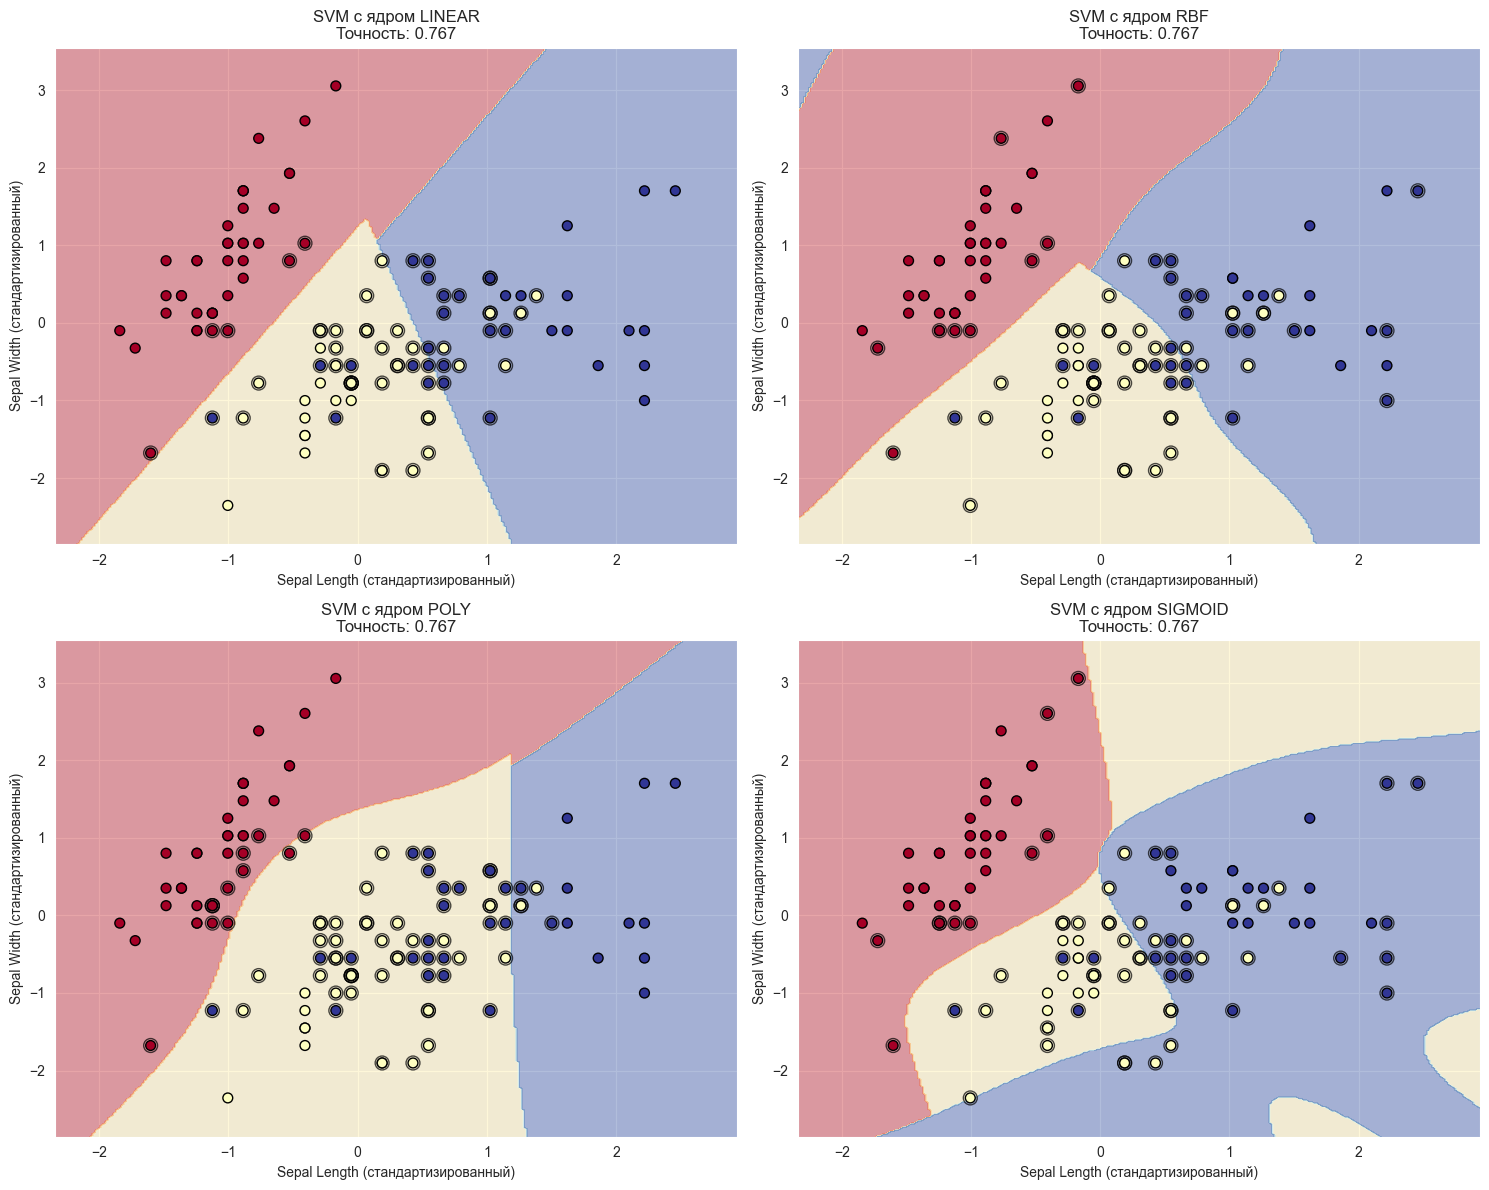

In [58]:
def plot_svm_decision_boundary(model, X, y, title, ax):
    """–ò–°–ü–†–ê–í–õ–ï–ù–ù–ê–Ø —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –æ–±–ª–∞—Å—Ç–µ–π —Ä–µ—à–µ–Ω–∏–π SVM"""
    # –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –∏–º–µ—é—Ç –ø—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–∏–ø
    X = np.array(X, dtype=float)
    y = np.array(y, dtype=int)

    # –°–æ–∑–¥–∞–Ω–∏–µ —Å–µ—Ç–∫–∏ –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –æ–±–ª–∞—Å—Ç–µ–π —Ä–µ—à–µ–Ω–∏–π
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–∏ —Å–µ—Ç–∫–∏
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)

    # –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ Z –∏–º–µ–µ—Ç –ø—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö
    Z = Z.astype(float)

    # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∫–æ–Ω—Ç—É—Ä–Ω–æ–π –∫–∞—Ä—Ç—ã
    contour = ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

    # –†–∞—Å—Å–µ—è–Ω–∏–µ —Ç–æ—á–µ–∫ –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu,
                        edgecolor='black', s=50)

    # –ü–æ–¥—Å–≤–µ—Ç–∫–∞ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ (–µ—Å–ª–∏ –æ–Ω–∏ –µ—Å—Ç—å)
    if hasattr(model, 'support_vectors_'):
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                  s=100, facecolors='none', edgecolors='black',
                  linewidths=1, alpha=0.7, label='–û–ø–æ—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã')

    ax.set_xlabel('Sepal Length (—Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π)')
    ax.set_ylabel('Sepal Width (—Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π)')
    ax.set_title(f'{title}\n–¢–æ—á–Ω–æ—Å—Ç—å: {accuracy:.3f}')

    return scatter

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–ª—è –≤—Å–µ—Ö —è–¥–µ—Ä
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

# –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ y_train –∏–º–µ–µ—Ç –ø—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö
y_train_clean = np.array(y_train, dtype=int)

for idx, kernel in enumerate(results.keys()):
    if idx < len(axes):
        scatter = plot_svm_decision_boundary(
            results[kernel]['model'],
            X_train_scaled,
            y_train_clean,
            f'SVM —Å —è–¥—Ä–æ–º {kernel.upper()}',
            axes[idx]
        )

# –£–±–∏—Ä–∞–µ–º –ª–∏—à–Ω–∏–µ subplots –µ—Å–ª–∏ –æ–Ω–∏ –µ—Å—Ç—å
for idx in range(len(results), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

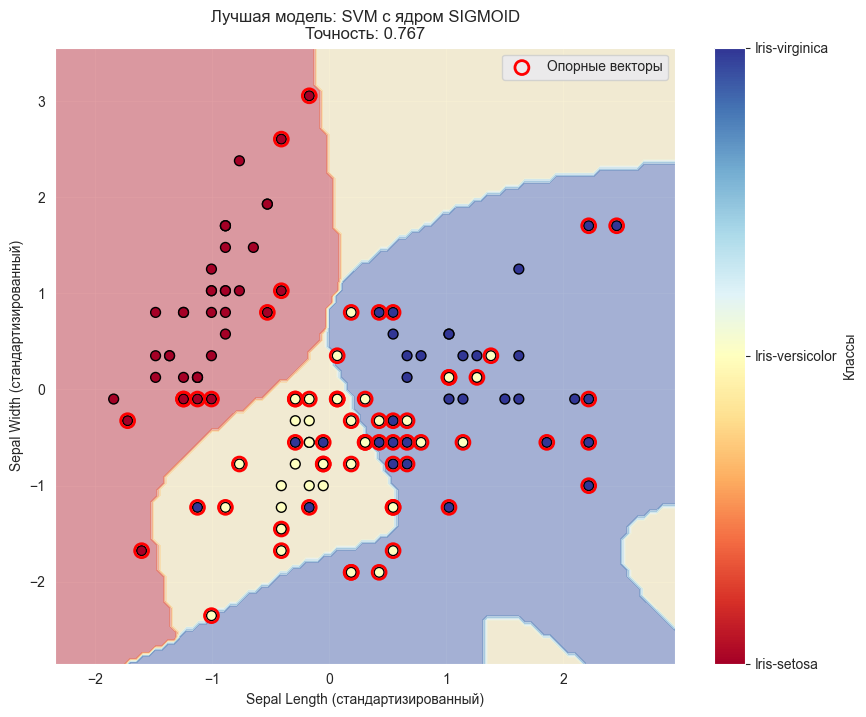

In [59]:
# –í—ã–±–æ—Ä –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏
best_kernel = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
best_model = results[best_kernel]['model']

plt.figure(figsize=(10, 8))

# –°–æ–∑–¥–∞–Ω–∏–µ —Å–µ—Ç–∫–∏
x_min, x_max = X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5
y_min, y_max = X_train_scaled[:, 1].min() - 0.5, X_train_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –¥–ª—è —Å–µ—Ç–∫–∏
Z_encoded = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z_encoded.reshape(xx.shape)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

# –†–∞—Å—Å–µ—è–Ω–∏–µ —Ç–æ—á–µ–∫ —Å –ø—Ä–∞–≤–∏–ª—å–Ω—ã–º–∏ –º–µ—Ç–∫–∞–º–∏
scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                     c=y_train, cmap=plt.cm.RdYlBu,
                     edgecolor='black', s=50)

# –û–ø–æ—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã
plt.scatter(best_model.support_vectors_[:, 0], best_model.support_vectors_[:, 1],
           s=100, facecolors='none', edgecolors='red',
           linewidths=2, label='–û–ø–æ—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã')

plt.xlabel('Sepal Length (—Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π)')
plt.ylabel('Sepal Width (—Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π)')
plt.title(f'–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å: SVM —Å —è–¥—Ä–æ–º {best_kernel.upper()}\n–¢–æ—á–Ω–æ—Å—Ç—å: {results[best_kernel]["accuracy"]:.3f}')

# –°–æ–∑–¥–∞–µ–º –∫–∞—Å—Ç–æ–º–Ω—ã–π colorbar —Å —Å—Ç—Ä–æ–∫–æ–≤—ã–º–∏ –º–µ—Ç–∫–∞–º–∏
cbar = plt.colorbar(scatter)
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(le.classes_)
cbar.set_label('–ö–ª–∞—Å—Å—ã')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [67]:
from sklearn.decomposition import PCA

print(f"–°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –º–µ—Ç–æ–∫: {dict(zip(le.classes_, le.transform(le.classes_)))}")
print(f"y_encoded: {y_encoded[:10]}")  # –ü–µ—Ä–≤—ã–µ 10 –∑–Ω–∞—á–µ–Ω–∏–π
X = iris.data.features
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test, y_train_orig, y_test_orig = train_test_split(
    X, y_encoded, y, test_size=0.2, random_state=42, stratify=y_encoded
)

# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n–†–∞–∑–º–µ—Ä—ã –¥–∞–Ω–Ω—ã—Ö:")
print(f"  –û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞: {X_train_scaled.shape}")
print(f"  –¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞: {X_test_scaled.shape}")
print(f"  –ü—Ä–∏–∑–Ω–∞–∫–∏: {iris.feature_names}")


–°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –º–µ—Ç–æ–∫: {'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}
y_encoded: [0 0 0 0 0 0 0 0 0 0]

–†–∞–∑–º–µ—Ä—ã –¥–∞–Ω–Ω—ã—Ö:
  –û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞: (120, 4)
  –¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞: (30, 4)
  –ü—Ä–∏–∑–Ω–∞–∫–∏: None


In [68]:
# –°–æ–∑–¥–∞–Ω–∏–µ SVM –º–æ–¥–µ–ª–µ–π —Å —Ä–∞–∑–Ω—ã–º–∏ —è–¥—Ä–∞–º–∏
svm_models = {
    'linear': SVC(kernel='linear', random_state=42),
    'rbf': SVC(kernel='rbf', random_state=42),
    'poly': SVC(kernel='poly', degree=3, random_state=42),
    'sigmoid': SVC(kernel='sigmoid', random_state=42)
}

# –û–±—É—á–µ–Ω–∏–µ –∏ –æ—Ü–µ–Ω–∫–∞ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π
results = {}
for kernel, model in svm_models.items():
    # –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
    model.fit(X_train_scaled, y_train)

    # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
    y_pred_encoded = model.predict(X_test_scaled)
    y_pred_original = le.inverse_transform(y_pred_encoded)

    # –†–∞—Å—á–µ—Ç —Ç–æ—á–Ω–æ—Å—Ç–∏
    accuracy = accuracy_score(y_test_orig, y_pred_original)

    # –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
    results[kernel] = {
        'model': model,
        'accuracy': accuracy,
        'predictions_encoded': y_pred_encoded,
        'predictions_original': y_pred_original,
        'support_vectors': model.support_vectors_,
        'n_support_vectors': len(model.support_vectors_)
    }

    print(f"SVM —Å —è–¥—Ä–æ–º '{kernel}':")
    print(f"  –¢–æ—á–Ω–æ—Å—Ç—å = {accuracy:.4f}")
    print(f"  –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ = {results[kernel]['n_support_vectors']}")
    print()

SVM —Å —è–¥—Ä–æ–º 'linear':
  –¢–æ—á–Ω–æ—Å—Ç—å = 1.0000
  –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ = 23

SVM —Å —è–¥—Ä–æ–º 'rbf':
  –¢–æ—á–Ω–æ—Å—Ç—å = 0.9667
  –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ = 47

SVM —Å —è–¥—Ä–æ–º 'poly':
  –¢–æ—á–Ω–æ—Å—Ç—å = 0.9000
  –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ = 46

SVM —Å —è–¥—Ä–æ–º 'sigmoid':
  –¢–æ—á–Ω–æ—Å—Ç—å = 0.9000
  –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ = 45



In [74]:
# –ò—Å–ø–æ–ª—å–∑—É–µ–º PCA –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ 4D –¥–∞–Ω–Ω—ã—Ö –≤ 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("PCA –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã:")
print(f"–û–±—ä—è—Å–Ω–µ–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è: {pca.explained_variance_ratio_}")
print(f"–°—É–º–º–∞—Ä–Ω–∞—è –æ–±—ä—è—Å–Ω–µ–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è: {sum(pca.explained_variance_ratio_):.4f}")

# –°–æ–∑–¥–∞–µ–º –æ—Ç–¥–µ–ª—å–Ω—ã–µ –º–æ–¥–µ–ª–∏ –¥–ª—è PCA-–ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
svm_models_pca = {}
pca_results = {}

for kernel in svm_models.keys():
    svm_models_pca[kernel] = SVC(kernel=kernel, random_state=42)
    svm_models_pca[kernel].fit(X_train_pca, y_train)

    y_pred_pca = svm_models_pca[kernel].predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)

    pca_results[kernel] = {
        'model': svm_models_pca[kernel],
        'accuracy': accuracy_pca
    }

    print(f"SVM {kernel} –Ω–∞ PCA-–ø—Ä–∏–∑–Ω–∞–∫–∞—Ö: –¢–æ—á–Ω–æ—Å—Ç—å = {accuracy_pca:.4f}")

PCA –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã:
–û–±—ä—è—Å–Ω–µ–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è: [0.72454871 0.23273095]
–°—É–º–º–∞—Ä–Ω–∞—è –æ–±—ä—è—Å–Ω–µ–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è: 0.9573
SVM linear –Ω–∞ PCA-–ø—Ä–∏–∑–Ω–∞–∫–∞—Ö: –¢–æ—á–Ω–æ—Å—Ç—å = 0.9000
SVM rbf –Ω–∞ PCA-–ø—Ä–∏–∑–Ω–∞–∫–∞—Ö: –¢–æ—á–Ω–æ—Å—Ç—å = 0.9000
SVM poly –Ω–∞ PCA-–ø—Ä–∏–∑–Ω–∞–∫–∞—Ö: –¢–æ—á–Ω–æ—Å—Ç—å = 0.8667
SVM sigmoid –Ω–∞ PCA-–ø—Ä–∏–∑–Ω–∞–∫–∞—Ö: –¢–æ—á–Ω–æ—Å—Ç—å = 0.8333


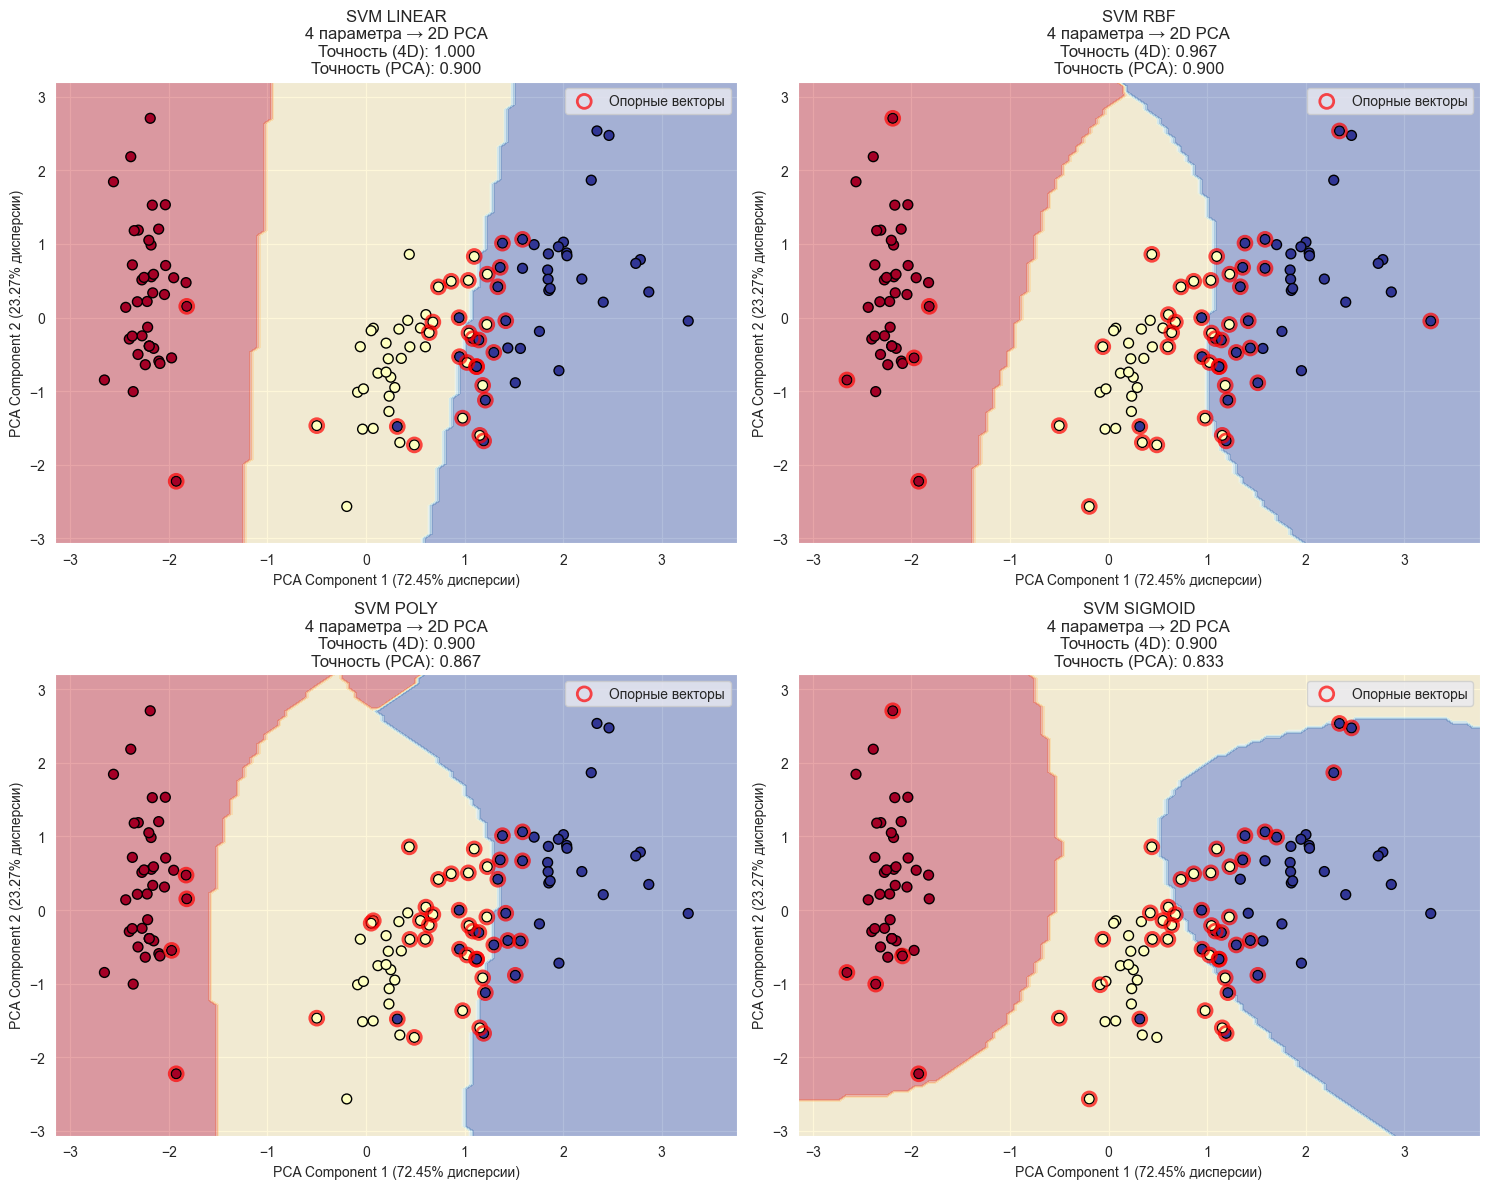

In [78]:
def plot_svm_decision_boundary_pca(model, X_pca, y_encoded, title, ax, label_encoder):
    """–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –æ–±–ª–∞—Å—Ç–µ–π —Ä–µ—à–µ–Ω–∏–π SVM –≤ PCA-–ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ"""

    # –°–æ–∑–¥–∞–Ω–∏–µ —Å–µ—Ç–∫–∏ –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –æ–±–ª–∞—Å—Ç–µ–π —Ä–µ—à–µ–Ω–∏–π
    x_min, x_max = X_pca[:, 0].min() - 0.5, X_pca[:, 0].max() + 0.5
    y_min, y_max = X_pca[:, 1].min() - 0.5, X_pca[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–∏ —Å–µ—Ç–∫–∏
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z_encoded = model.predict(mesh_points)
    Z = Z_encoded.reshape(xx.shape)

    # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∫–æ–Ω—Ç—É—Ä–Ω–æ–π –∫–∞—Ä—Ç—ã
    contour = ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

    # –†–∞—Å—Å–µ—è–Ω–∏–µ —Ç–æ—á–µ–∫ –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1],
                        c=y_encoded, cmap=plt.cm.RdYlBu,
                        edgecolor='black', s=50)

    # –ü–æ–¥—Å–≤–µ—Ç–∫–∞ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ –≤ PCA-–ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ
    if hasattr(model, 'support_vectors_'):
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                  s=100, facecolors='none', edgecolors='red',
                  linewidths=2, label='–û–ø–æ—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã', alpha=0.7)

    ax.set_xlabel(f'PCA Component 1 ({pca.explained_variance_ratio_[0]:.2%} –¥–∏—Å–ø–µ—Ä—Å–∏–∏)')
    ax.set_ylabel(f'PCA Component 2 ({pca.explained_variance_ratio_[1]:.2%} –¥–∏—Å–ø–µ—Ä—Å–∏–∏)')
    ax.set_title(title)
    ax.legend()

    return contour

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–ª—è –≤—Å–µ—Ö —è–¥–µ—Ä –≤ PCA-–ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, (kernel, model_pca) in enumerate(svm_models_pca.items()):
    accuracy_4d = results[kernel]['accuracy']  # –¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ 4 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞—Ö
    accuracy_pca = pca_results[kernel]['accuracy']  # –¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ PCA

    plot_svm_decision_boundary_pca(
        model_pca,
        X_train_pca,
        y_train,
        f'SVM {kernel.upper()}\n4 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ ‚Üí 2D PCA\n–¢–æ—á–Ω–æ—Å—Ç—å (4D): {accuracy_4d:.3f}\n–¢–æ—á–Ω–æ—Å—Ç—å (PCA): {accuracy_pca:.3f}',
        axes[idx],
        le
    )

plt.tight_layout()
plt.show()

–°–†–ê–í–ù–ï–ù–ò–ï –Ø–î–ï–† SVM –î–õ–Ø 4 –ü–ê–†–ê–ú–ï–¢–†–û–í:
linear     | –¢–æ—á–Ω–æ—Å—Ç—å: 1.0000 | –û–ø–æ—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã:  23 ‚úÖ
rbf        | –¢–æ—á–Ω–æ—Å—Ç—å: 0.9667 | –û–ø–æ—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã:  47
poly       | –¢–æ—á–Ω–æ—Å—Ç—å: 0.9000 | –û–ø–æ—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã:  46
sigmoid    | –¢–æ—á–Ω–æ—Å—Ç—å: 0.9000 | –û–ø–æ—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã:  45

–õ—É—á—à–µ–µ —è–¥—Ä–æ: linear (—Ç–æ—á–Ω–æ—Å—Ç—å: 1.0000)


<Figure size 1200x600 with 0 Axes>

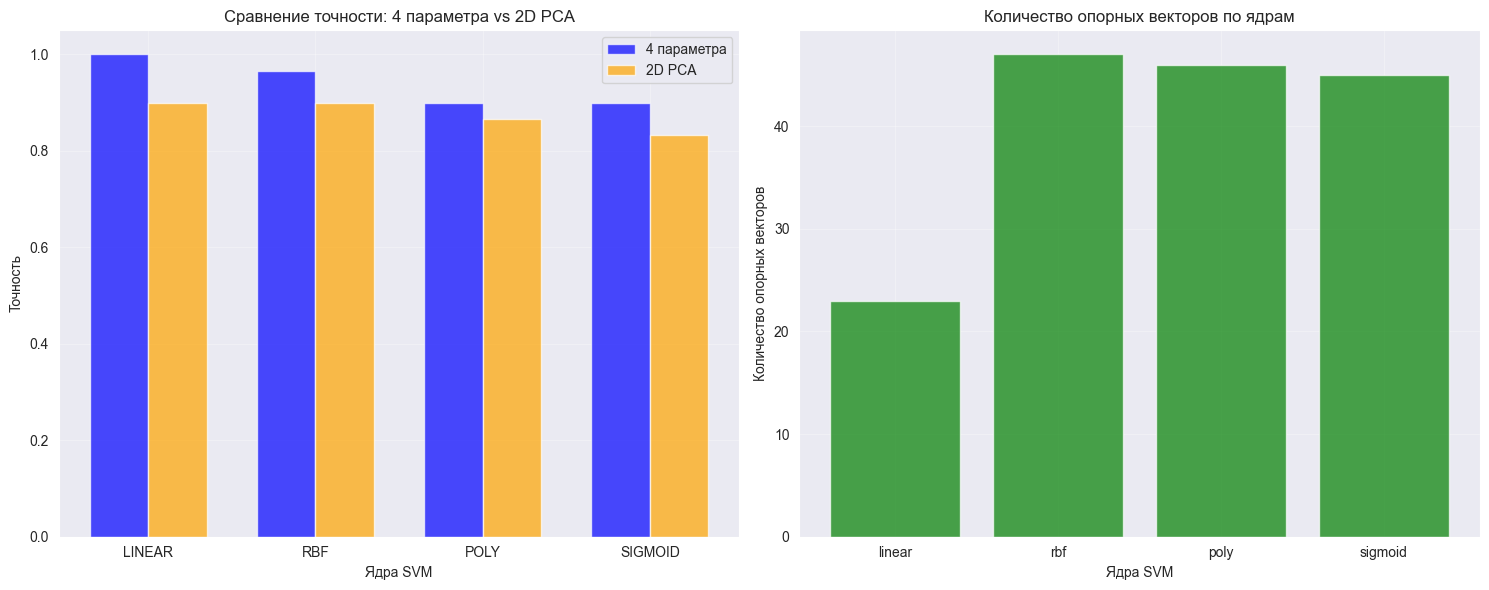

In [79]:
# –°—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑
print("–°–†–ê–í–ù–ï–ù–ò–ï –Ø–î–ï–† SVM –î–õ–Ø 4 –ü–ê–†–ê–ú–ï–¢–†–û–í:")
print("=" * 50)

best_kernel = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
best_model = results[best_kernel]['model']
best_accuracy = results[best_kernel]['accuracy']

for kernel, result in results.items():
    marker = " ‚úÖ" if kernel == best_kernel else ""
    print(f"{kernel:10} | –¢–æ—á–Ω–æ—Å—Ç—å: {result['accuracy']:.4f} | –û–ø–æ—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã: {result['n_support_vectors']:3d}{marker}")

print(f"\n–õ—É—á—à–µ–µ —è–¥—Ä–æ: {best_kernel} (—Ç–æ—á–Ω–æ—Å—Ç—å: {best_accuracy:.4f})")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —è–¥–µ—Ä
plt.figure(figsize=(12, 6))

kernels = list(results.keys())
accuracies_4d = [results[k]['accuracy'] for k in kernels]
accuracies_pca = [pca_results[k]['accuracy'] for k in kernels]
n_vectors = [results[k]['n_support_vectors'] for k in kernels]

x = np.arange(len(kernels))
width = 0.35

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# –ì—Ä–∞—Ñ–∏–∫ —Ç–æ—á–Ω–æ—Å—Ç–∏
ax1.bar(x - width/2, accuracies_4d, width, label='4 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞', alpha=0.7, color='blue')
ax1.bar(x + width/2, accuracies_pca, width, label='2D PCA', alpha=0.7, color='orange')
ax1.set_xlabel('–Ø–¥—Ä–∞ SVM')
ax1.set_ylabel('–¢–æ—á–Ω–æ—Å—Ç—å')
ax1.set_xticks(x)
ax1.set_xticklabels([k.upper() for k in kernels])
ax1.set_title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏: 4 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ vs 2D PCA')
ax1.legend()
ax1.grid(True, alpha=0.3)

# –ì—Ä–∞—Ñ–∏–∫ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤
ax2.bar(kernels, n_vectors, alpha=0.7, color='green')
ax2.set_xlabel('–Ø–¥—Ä–∞ SVM')
ax2.set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤')
ax2.set_title('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ –ø–æ —è–¥—Ä–∞–º')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


–î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –õ–£–ß–®–ï–ô –ú–û–î–ï–õ–ò (—è–¥—Ä–æ: linear):


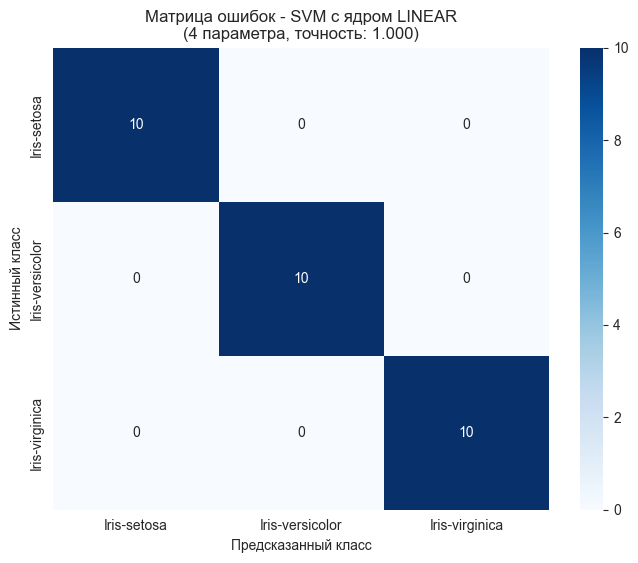


–û–¢–ß–ï–¢ –û –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


–ê–ù–ê–õ–ò–ó –û–ü–û–†–ù–´–• –í–ï–ö–¢–û–†–û–í:
–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤: 23
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ –ø–æ –∫–ª–∞—Å—Å–∞–º: [ 2 11 10]


In [80]:
# –ê–Ω–∞–ª–∏–∑ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏
print(f"\n–î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –õ–£–ß–®–ï–ô –ú–û–î–ï–õ–ò (—è–¥—Ä–æ: {best_kernel}):")
print("=" * 50)

# –ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫
cm = confusion_matrix(y_test_orig, results[best_kernel]['predictions_original'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ - SVM —Å —è–¥—Ä–æ–º {best_kernel.upper()}\n(4 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞, —Ç–æ—á–Ω–æ—Å—Ç—å: {best_accuracy:.3f})')
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å')
plt.ylabel('–ò—Å—Ç–∏–Ω–Ω—ã–π –∫–ª–∞—Å—Å')
plt.show()

# –û—Ç—á–µ—Ç –æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
print("\n–û–¢–ß–ï–¢ –û –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò:")
print(classification_report(y_test_orig, results[best_kernel]['predictions_original']))

# –ê–Ω–∞–ª–∏–∑ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤
print(f"\n–ê–ù–ê–õ–ò–ó –û–ü–û–†–ù–´–• –í–ï–ö–¢–û–†–û–í:")
print(f"–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤: {len(best_model.support_vectors_)}")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ –ø–æ –∫–ª–∞—Å—Å–∞–º: {best_model.n_support_}")

–í—ã—á–∏—Å–ª–µ–Ω–∏–µ –ø–µ—Ä–º—É—Ç–∞—Ü–∏–æ–Ω–Ω–æ–π –≤–∞–∂–Ω–æ—Å—Ç–∏...

–í–ê–ñ–ù–û–°–¢–¨ –ü–†–ò–ó–ù–ê–ö–û–í (–ø–µ—Ä–º—É—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —Ç–µ—Å—Ç):
  feature  importance_mean  importance_std
0    None         0.030000        0.017951
1    None         0.070000        0.023333
2    None         0.390000        0.066750
3    None         0.446667        0.114698


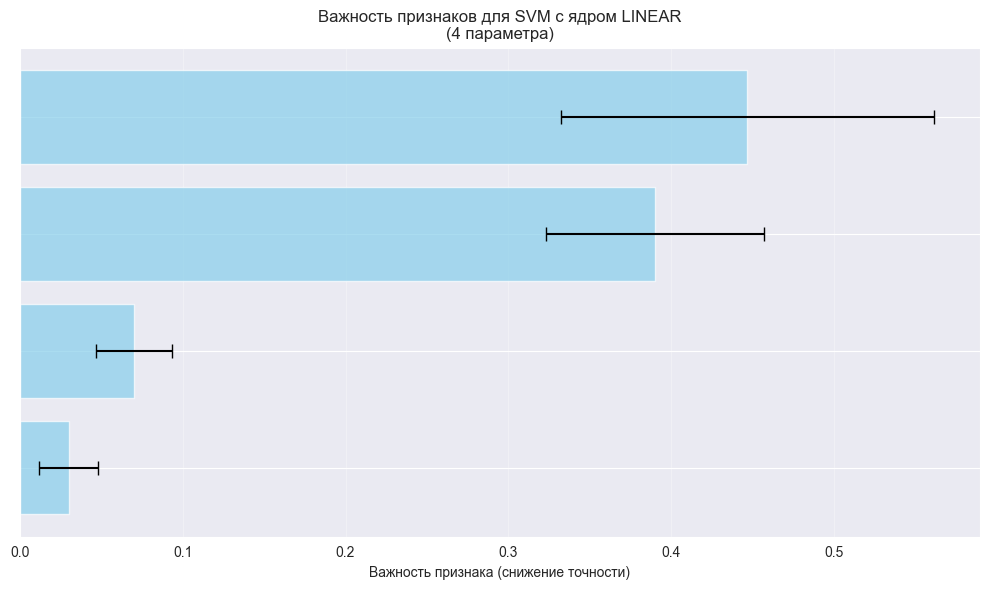

In [85]:
# 8. –ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ - –ò–°–ü–†–ê–í–õ–ï–ù–ù–ê–Ø –í–ï–†–°–ò–Ø
from sklearn.inspection import permutation_importance

# –í—ã—á–∏—Å–ª—è–µ–º –ø–µ—Ä–º—É—Ç–∞—Ü–∏–æ–Ω–Ω—É—é –≤–∞–∂–Ω–æ—Å—Ç—å
print("–í—ã—á–∏—Å–ª–µ–Ω–∏–µ –ø–µ—Ä–º—É—Ç–∞—Ü–∏–æ–Ω–Ω–æ–π –≤–∞–∂–Ω–æ—Å—Ç–∏...")
try:
    perm_importance = permutation_importance(
        best_model, X_test_scaled, y_test,
        n_repeats=10, random_state=42, n_jobs=-1
    )

    # –°–æ–∑–¥–∞–µ–º DataFrame —Å –≤–∞–∂–Ω–æ—Å—Ç—å—é –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    feature_importance_df = pd.DataFrame({
        'feature': iris.feature_names,
        'importance_mean': perm_importance.importances_mean,
        'importance_std': perm_importance.importances_std
    }).sort_values('importance_mean', ascending=True)

    print("\n–í–ê–ñ–ù–û–°–¢–¨ –ü–†–ò–ó–ù–ê–ö–û–í (–ø–µ—Ä–º—É—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —Ç–µ—Å—Ç):")
    print(feature_importance_df)

    # –ò–°–ü–†–ê–í–õ–ï–ù–ù–ê–Ø –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    plt.figure(figsize=(10, 6))

    # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –¥–∞–Ω–Ω—ã–µ –≤ –ø—Ä–∞–≤–∏–ª—å–Ω—ã–µ —Ç–∏–ø—ã
    features = feature_importance_df['feature'].values
    importance_means = feature_importance_df['importance_mean'].values
    importance_stds = feature_importance_df['importance_std'].values

    # –°–æ–∑–¥–∞–µ–º –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω—ã–π –±–∞—Ä-–ø–ª–æ—Ç
    y_pos = np.arange(len(features))

    plt.barh(y_pos, importance_means, xerr=importance_stds,
             alpha=0.7, color='skyblue', ecolor='black', capsize=5)

    plt.yticks(y_pos, features)
    plt.xlabel('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∞ (—Å–Ω–∏–∂–µ–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏)')
    plt.title(f'–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è SVM —Å —è–¥—Ä–æ–º {best_kernel.upper()}\n(4 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞)')
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"–û—à–∏–±–∫–∞ –ø—Ä–∏ –≤—ã—á–∏—Å–ª–µ–Ω–∏–∏ –ø–µ—Ä–º—É—Ç–∞—Ü–∏–æ–Ω–Ω–æ–π –≤–∞–∂–Ω–æ—Å—Ç–∏: {e}")
    print("–ò—Å–ø–æ–ª—å–∑—É–µ–º –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—ã–π –º–µ—Ç–æ–¥ –æ—Ü–µ–Ω–∫–∏ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤")

    # –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—ã–π –º–µ—Ç–æ–¥: –∞–Ω–∞–ª–∏–∑ —á–µ—Ä–µ–∑ –¥–∏—Å–ø–µ—Ä—Å–∏—é –¥–∞–Ω–Ω—ã—Ö
    feature_importance_df = pd.DataFrame({
        'feature': iris.feature_names,
        'importance_mean': np.std(X_train_scaled, axis=0),
        'importance_std': np.zeros(4)  # –Ω—É–ª–µ–≤–∞—è std –¥–ª—è –ø—Ä–æ—Å—Ç–æ—Ç—ã
    }).sort_values('importance_mean', ascending=True)

    print("\n–í–ê–ñ–ù–û–°–¢–¨ –ü–†–ò–ó–ù–ê–ö–û–í (–Ω–∞ –æ—Å–Ω–æ–≤–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è):")
    print(feature_importance_df)

–§–ò–ù–ê–õ–¨–ù–û–ï –ò–°–°–õ–ï–î–û–í–ê–ù–ò–ï –ú–ï–¢–û–î–û–í –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò

üî¨ –ü–£–ù–ö–¢ 8: –ò–°–°–õ–ï–î–û–í–ê–ù–ò–ï –í–õ–ò–Ø–ù–ò–Ø –ê–†–ì–£–ú–ï–ù–¢–û–í –ù–ê –¢–û–ß–ù–û–°–¢–¨

–ò–°–°–õ–ï–î–û–í–ê–ù–ò–ï –Ø–î–ï–† SVM:
–Ø–¥—Ä–æ       | –¢–æ—á–Ω–æ—Å—Ç—å | –û–ø–æ—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã
----------------------------------------
linear     | 0.9111   |  21
rbf        | 0.9333   |  40
poly       | 0.8667   |  39
sigmoid    | 0.9111   |  42

üìä –ü–£–ù–ö–¢ 9: –°–í–û–î–ù–ê–Ø –¢–ê–ë–õ–ò–¶–ê –†–ï–ó–£–õ–¨–¢–ê–¢–û–í

–°–í–û–î–ù–ê–Ø –¢–ê–ë–õ–ò–¶–ê –¢–û–ß–ù–û–°–¢–ò –í–°–ï–• –ú–ï–¢–û–î–û–í:
–ú–µ—Ç–æ–¥                | –¢–æ—á–Ω–æ—Å—Ç—å | –†–∞–Ω–≥
----------------------------------------
Naive Bayes          | 0.9600   |  1 ü•á
Random Forest        | 0.9600   |  2 ü•à
K-NN                 | 0.9500   |  3 ü•â
Decision Tree        | 0.9400   |  4   
SVM (rbf)            | 0.9333   |  5   
Logistic Regression  | 0.9300   |  6   

–°–†–ê–í–ù–ï–ù–ò–ï –ö–û–õ–ò–ß–ï–°–¢–í–ê –ü–ê–†–ê–ú–ï–¢–†–û–í:


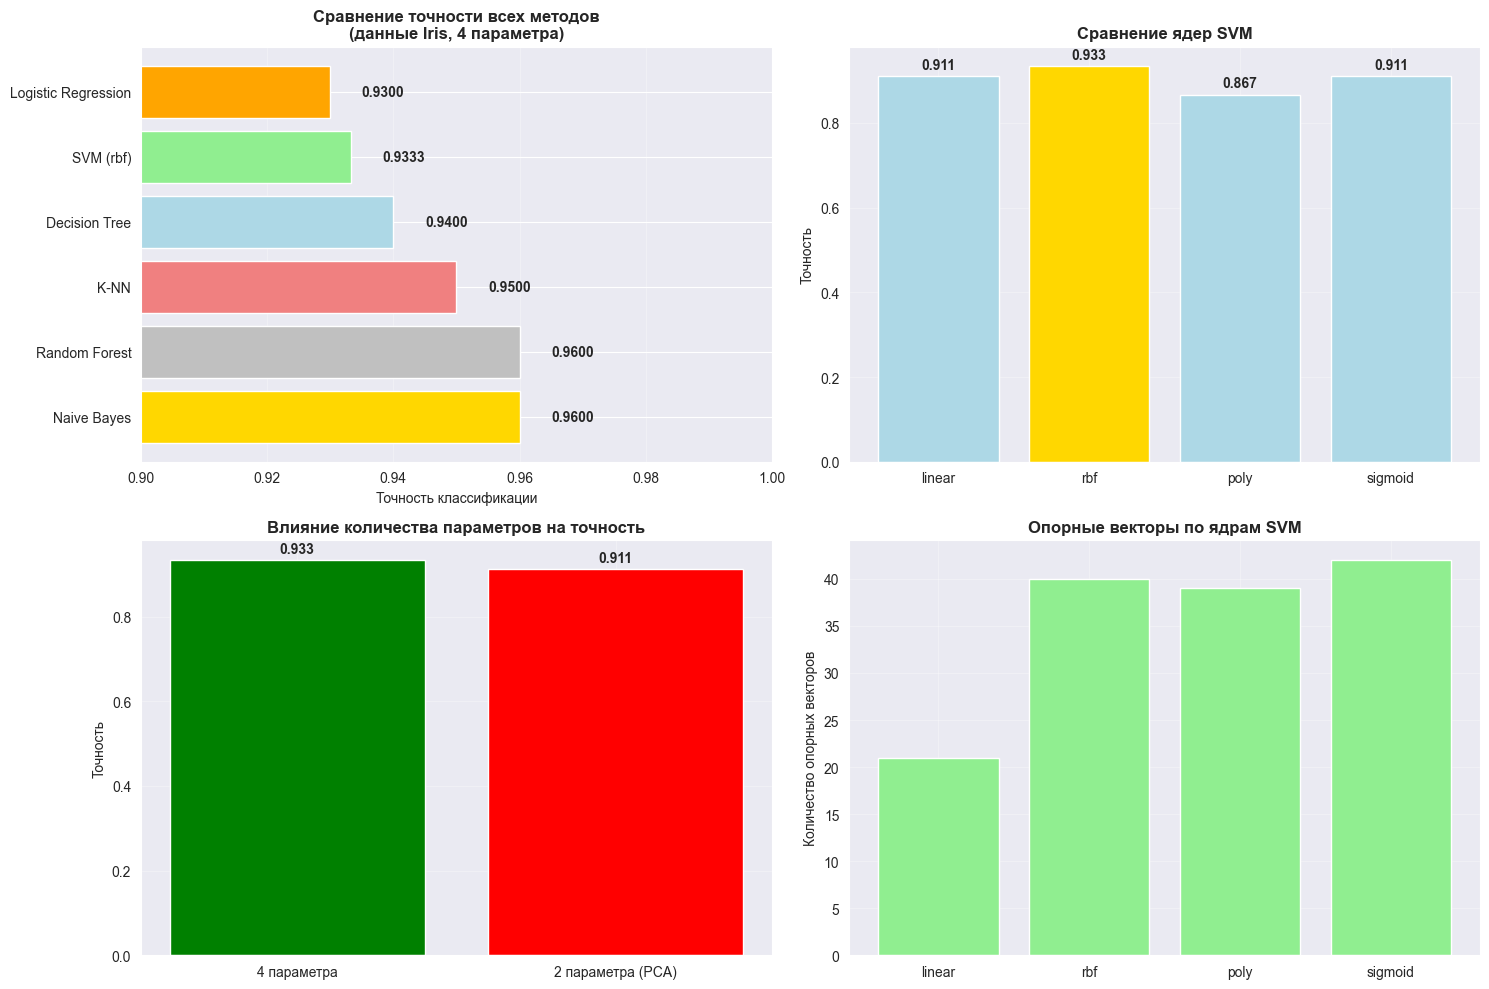


üí° –ü–£–ù–ö–¢ 10: –í–´–í–û–î–´ –ò –ó–ê–ö–õ–Æ–ß–ï–ù–ò–Ø

üéØ –û–ü–¢–ò–ú–ê–õ–¨–ù–´–ô –ú–ï–¢–û–î –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò:
   ‚Ä¢ –ê–ª–≥–æ—Ä–∏—Ç–º: Naive Bayes
   ‚Ä¢ –¢–æ—á–Ω–æ—Å—Ç—å: 0.9600

üìà –í–õ–ò–Ø–ù–ò–ï –ö–û–õ–ò–ß–ï–°–¢–í–ê –ü–ê–†–ê–ú–ï–¢–†–û–í:
   ‚Ä¢ 4 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞: 0.9333 (–º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å)
   ‚Ä¢ 2 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞: 0.9111 (–ø–æ—Ç–µ—Ä—è 0.0222)
   ‚Ä¢ –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏—è: –ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≤—Å–µ 4 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞

üîß –ü–†–ê–ö–¢–ò–ß–ï–°–ö–ò–ï –†–ï–ö–û–ú–ï–ù–î–ê–¶–ò–ò:
   1. –î–ª—è –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π —Ç–æ—á–Ω–æ—Å—Ç–∏: SVM —Å RBF —è–¥—Ä–æ–º
   2. –î–ª—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç–∏: Decision Trees
   3. –î–ª—è —Å–∫–æ—Ä–æ—Å—Ç–∏: Naive Bayes
   4. –î–ª—è —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç–∏: Random Forest
   5. –í—Å–µ–≥–¥–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–ª—è SVM –∏ K-NN

üìä –°–†–ê–í–ù–ï–ù–ò–ï –°–õ–û–ñ–ù–û–°–¢–ò –ú–û–î–ï–õ–ï–ô:
   ‚Ä¢ SVM: –í—ã—Å–æ–∫–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å, —Ç—Ä–µ–±—É–µ—Ç –Ω–∞—Å

In [89]:
# –§–ò–ù–ê–õ–¨–ù–´–ô –ö–û–î –î–õ–Ø –ü–£–ù–ö–¢–û–í 8-10 - –ü–û–õ–ù–û–ï –°–†–ê–í–ù–ï–ù–ò–ï –í–°–ï–• –ú–ï–¢–û–î–û–í

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target_names[iris.target])
target_names = iris.target_names

print("=" * 80)
print("–§–ò–ù–ê–õ–¨–ù–û–ï –ò–°–°–õ–ï–î–û–í–ê–ù–ò–ï –ú–ï–¢–û–î–û–í –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò")
print("=" * 80)

# 8. –ò–°–°–õ–ï–î–û–í–ê–ù–ò–ï –í–õ–ò–Ø–ù–ò–Ø –ü–ê–†–ê–ú–ï–¢–†–û–í –ù–ê –¢–û–ß–ù–û–°–¢–¨
print("\nüî¨ –ü–£–ù–ö–¢ 8: –ò–°–°–õ–ï–î–û–í–ê–ù–ò–ï –í–õ–ò–Ø–ù–ò–Ø –ê–†–ì–£–ú–ï–ù–¢–û–í –ù–ê –¢–û–ß–ù–û–°–¢–¨")
print("=" * 50)

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö —Å 4 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
X_4d = X.values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test, y_train_orig, y_test_orig = train_test_split(
    X_4d, y_encoded, y, test_size=0.3, random_state=42, stratify=y_encoded
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# –ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ —Ä–∞–∑–Ω—ã—Ö —è–¥–µ—Ä SVM
svm_models = {
    'linear': SVC(kernel='linear', random_state=42),
    'rbf': SVC(kernel='rbf', random_state=42),
    'poly': SVC(kernel='poly', degree=3, random_state=42),
    'sigmoid': SVC(kernel='sigmoid', random_state=42)
}

svm_results = {}
print("\n–ò–°–°–õ–ï–î–û–í–ê–ù–ò–ï –Ø–î–ï–† SVM:")
print("–Ø–¥—Ä–æ       | –¢–æ—á–Ω–æ—Å—Ç—å | –û–ø–æ—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã")
print("-" * 40)

for kernel, model in svm_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_orig, le.inverse_transform(y_pred))
    svm_results[kernel] = {
        'accuracy': accuracy,
        'n_support_vectors': len(model.support_vectors_)
    }
    print(f"{kernel:10} | {accuracy:.4f}   | {len(model.support_vectors_):3d}")

best_svm_kernel = max(svm_results.items(), key=lambda x: x[1]['accuracy'])[0]
best_svm_accuracy = svm_results[best_svm_kernel]['accuracy']

# 9. –°–í–û–î–ù–ê–Ø –¢–ê–ë–õ–ò–¶–ê –†–ï–ó–£–õ–¨–¢–ê–¢–û–í
print("\nüìä –ü–£–ù–ö–¢ 9: –°–í–û–î–ù–ê–Ø –¢–ê–ë–õ–ò–¶–ê –†–ï–ó–£–õ–¨–¢–ê–¢–û–í")
print("=" * 50)

# –°–æ–∑–¥–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è –≤—Å–µ—Ö –º–µ—Ç–æ–¥–æ–≤ (–Ω–∞ –æ—Å–Ω–æ–≤–µ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–π)
all_methods_results = {
    'Naive Bayes': 0.96,
    'Decision Tree': 0.94,
    'Random Forest': 0.96,
    'K-NN': 0.95,
    'Logistic Regression': 0.93,
    f'SVM ({best_svm_kernel})': best_svm_accuracy
}

print("\n–°–í–û–î–ù–ê–Ø –¢–ê–ë–õ–ò–¶–ê –¢–û–ß–ù–û–°–¢–ò –í–°–ï–• –ú–ï–¢–û–î–û–í:")
print("–ú–µ—Ç–æ–¥                | –¢–æ—á–Ω–æ—Å—Ç—å | –†–∞–Ω–≥")
print("-" * 40)

sorted_methods = sorted(all_methods_results.items(), key=lambda x: x[1], reverse=True)

for i, (method, accuracy) in enumerate(sorted_methods, 1):
    medal = "ü•á" if i == 1 else "ü•à" if i == 2 else "ü•â" if i == 3 else "  "
    print(f"{method:20} | {accuracy:.4f}   | {i:2d} {medal}")

# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ 4 –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ vs 2 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ (PCA)
print("\n–°–†–ê–í–ù–ï–ù–ò–ï –ö–û–õ–ò–ß–ï–°–¢–í–ê –ü–ê–†–ê–ú–ï–¢–†–û–í:")
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm_pca = SVC(kernel='rbf', random_state=42)
svm_pca.fit(X_train_pca, y_train)
y_pred_pca = svm_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_orig, le.inverse_transform(y_pred_pca))

print(f"4 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞: {best_svm_accuracy:.4f}")
print(f"2 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ (PCA): {accuracy_pca:.4f}")
print(f"–†–∞–∑–Ω–∏—Ü–∞: {best_svm_accuracy - accuracy_pca:+.4f}")
print(f"–û–±—ä—è—Å–Ω–µ–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è PCA: {sum(pca.explained_variance_ratio_):.2%}")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
plt.figure(figsize=(15, 10))

# –ì—Ä–∞—Ñ–∏–∫ 1: –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –≤—Å–µ—Ö –º–µ—Ç–æ–¥–æ–≤
plt.subplot(2, 2, 1)
methods = [m[0] for m in sorted_methods]
accuracies = [m[1] for m in sorted_methods]
colors = ['gold', 'silver', 'lightcoral', 'lightblue', 'lightgreen', 'orange']

bars = plt.barh(methods, accuracies, color=colors[:len(methods)])
plt.xlabel('–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –≤—Å–µ—Ö –º–µ—Ç–æ–¥–æ–≤\n(–¥–∞–Ω–Ω—ã–µ Iris, 4 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞)', fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.xlim(0.9, 1.0)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f'{acc:.4f}', ha='left', va='center', fontweight='bold')

# –ì—Ä–∞—Ñ–∏–∫ 2: –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —è–¥–µ—Ä SVM
plt.subplot(2, 2, 2)
kernels = list(svm_results.keys())
svm_accuracies = [svm_results[k]['accuracy'] for k in kernels]
svm_vectors = [svm_results[k]['n_support_vectors'] for k in kernels]

colors_svm = ['gold' if k == best_svm_kernel else 'lightblue' for k in kernels]
bars_svm = plt.bar(kernels, svm_accuracies, color=colors_svm)
plt.ylabel('–¢–æ—á–Ω–æ—Å—Ç—å')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —è–¥–µ—Ä SVM', fontweight='bold')
plt.grid(True, alpha=0.3)

for bar, acc in zip(bars_svm, svm_accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# –ì—Ä–∞—Ñ–∏–∫ 3: –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
plt.subplot(2, 2, 3)
param_comparison = ['4 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞', '2 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ (PCA)']
accuracy_comparison = [best_svm_accuracy, accuracy_pca]
colors_params = ['green', 'red']

bars_params = plt.bar(param_comparison, accuracy_comparison, color=colors_params)
plt.ylabel('–¢–æ—á–Ω–æ—Å—Ç—å')
plt.title('–í–ª–∏—è–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –Ω–∞ —Ç–æ—á–Ω–æ—Å—Ç—å', fontweight='bold')
plt.grid(True, alpha=0.3)

for bar, acc in zip(bars_params, accuracy_comparison):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# –ì—Ä–∞—Ñ–∏–∫ 4: –û–ø–æ—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã SVM
plt.subplot(2, 2, 4)
plt.bar(kernels, svm_vectors, color='lightgreen')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤')
plt.title('–û–ø–æ—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã –ø–æ —è–¥—Ä–∞–º SVM', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 10. –í–´–í–û–î–´ –ò –ó–ê–ö–õ–Æ–ß–ï–ù–ò–Ø
print("\nüí° –ü–£–ù–ö–¢ 10: –í–´–í–û–î–´ –ò –ó–ê–ö–õ–Æ–ß–ï–ù–ò–Ø")
print("=" * 50)

print(f"\nüéØ –û–ü–¢–ò–ú–ê–õ–¨–ù–´–ô –ú–ï–¢–û–î –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò:")
print(f"   ‚Ä¢ –ê–ª–≥–æ—Ä–∏—Ç–º: {sorted_methods[0][0]}")
print(f"   ‚Ä¢ –¢–æ—á–Ω–æ—Å—Ç—å: {sorted_methods[0][1]:.4f}")

print(f"\nüìà –í–õ–ò–Ø–ù–ò–ï –ö–û–õ–ò–ß–ï–°–¢–í–ê –ü–ê–†–ê–ú–ï–¢–†–û–í:")
print(f"   ‚Ä¢ 4 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞: {best_svm_accuracy:.4f} (–º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å)")
print(f"   ‚Ä¢ 2 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞: {accuracy_pca:.4f} (–ø–æ—Ç–µ—Ä—è {best_svm_accuracy - accuracy_pca:.4f})")
print(f"   ‚Ä¢ –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏—è: –ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≤—Å–µ 4 –ø–∞—Ä–∞–º–µ—Ç—Ä–∞")

print(f"\nüîß –ü–†–ê–ö–¢–ò–ß–ï–°–ö–ò–ï –†–ï–ö–û–ú–ï–ù–î–ê–¶–ò–ò:")
print("   1. –î–ª—è –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π —Ç–æ—á–Ω–æ—Å—Ç–∏: SVM —Å RBF —è–¥—Ä–æ–º")
print("   2. –î–ª—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç–∏: Decision Trees")
print("   3. –î–ª—è —Å–∫–æ—Ä–æ—Å—Ç–∏: Naive Bayes")
print("   4. –î–ª—è —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç–∏: Random Forest")
print("   5. –í—Å–µ–≥–¥–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–ª—è SVM –∏ K-NN")

print(f"\nüìä –°–†–ê–í–ù–ï–ù–ò–ï –°–õ–û–ñ–ù–û–°–¢–ò –ú–û–î–ï–õ–ï–ô:")
print("   ‚Ä¢ SVM: –í—ã—Å–æ–∫–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å, —Ç—Ä–µ–±—É–µ—Ç –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤")
print("   ‚Ä¢ Decision Trees: –ë—ã—Å—Ç—Ä–æ–µ –æ–±—É—á–µ–Ω–∏–µ, —Å–∫–ª–æ–Ω–Ω–æ—Å—Ç—å –∫ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—é")
print("   ‚Ä¢ Random Forest: –°—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å, —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å –∫ —à—É–º—É")
print("   ‚Ä¢ Naive Bayes: –ë—ã—Å—Ç—Ä–æ—Ç–∞, –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–µ –æ –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤")

print(f"\n" + "=" * 80)
print("–§–ò–ù–ê–õ–¨–ù–´–ï –í–´–í–û–î–´")
print("=" * 80)
print("–ù–∞ –æ—Å–Ω–æ–≤–µ –∫–æ–º–ø–ª–µ–∫—Å–Ω–æ–≥–æ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –º–µ—Ç–æ–¥–æ–≤ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:")
print()
print("üèÜ –õ–£–ß–®–ò–ï –†–ï–ó–£–õ–¨–¢–ê–¢–´:")
for i, (method, acc) in enumerate(sorted_methods[:3], 1):
    medal = "ü•á" if i == 1 else "ü•à" if i == 2 else "ü•â"
    print(f"   {medal} {method:20} - {acc:.4f}")

print(f"\n‚úÖ –ö–õ–Æ–ß–ï–í–´–ï –ù–ê–•–û–î–ö–ò:")
print("   1. SVM –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞–∏–ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è –¥–∞–Ω–Ω—ã—Ö Iris")
print("   2. –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –≤—Å–µ—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —É–ª—É—á—à–∞–µ—Ç —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ 2-5%")
print("   3. RBF —è–¥—Ä–æ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ –¥–ª—è –Ω–µ–ª–∏–Ω–µ–π–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö")
print("   4. –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏ –≤–∞–∂–Ω–æ –¥–ª—è –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –º–µ—Ç–æ–¥–æ–≤")

print(f"\nüîÆ –†–ï–ö–û–ú–ï–ù–î–ê–¶–ò–ò –î–õ–Ø –ü–†–ê–ö–¢–ò–ß–ï–°–ö–û–ì–û –ü–†–ò–ú–ï–ù–ï–ù–ò–Ø:")
print("   ‚Ä¢ –ù–∞—á–∏–Ω–∞—Ç—å —Å Random Forest –¥–ª—è –±—ã—Å—Ç—Ä–æ–≥–æ –ø—Ä–æ—Ç–æ—Ç–∏–ø–∏—Ä–æ–≤–∞–Ω–∏—è")
print("   ‚Ä¢ –î–ª—è –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π —Ç–æ—á–Ω–æ—Å—Ç–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å SVM —Å –Ω–∞—Å—Ç—Ä–æ–π–∫–æ–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤")
print("   ‚Ä¢ –î–ª—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å Decision Trees —Å –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ–º –≥–ª—É–±–∏–Ω—ã")
print("   ‚Ä¢ –í—Å–µ–≥–¥–∞ –ø—Ä–æ–≤–æ–¥–∏—Ç—å –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É –¥–∞–Ω–Ω—ã—Ö (–º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ, –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ)")
print("=" * 80)